# Data 100 - [Final Project ](http://www.ds100.org/sp20/resources/assets/final_proj/final_proj_spec.pdf)
## Spring 2020

### Saketh Kollu, Anita Shen, Nicholas Wang

Dataset: [Contraceptive](https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice)

[Rubric](https://d1b10bmlvqabco.cloudfront.net/attach/k4zyqkjkyt33a2/j4f6z772zscwl/k9ns0abjn95w/Undergrad_DS_100_Final_Project_Rubric_Release.pdf)



# Guiding Questions

1. Which column variable affects the Contraceptive method used the most?
2. How is the Contraceptive method used related to the number of children?
3. Can we build a multinomial logistic regression to predict which type of contraceptive method used by an individual given certain variables?

Alright here we put our questions maybe hypotheseses etc

In [276]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Library imports

import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Data imports

data = pd.read_csv("./contraceptive_for_students.csv")
data.sample(5)


,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
1455,32,2,2,6,1,1,2,3,0,3
419,36,3,3,5,1,0,1,3,0,2
150,44,4,4,3,1,1,2,4,0,1
628,39,4,4,4,0,1,1,4,0,2
1243,22,4,4,1,1,0,2,2,0,2


Attribute Information:

1. Wife's age (numerical)
2. Wife's education (categorical) 1=low, 2, 3, 4=high
3. Husband's education (categorical) 1=low, 2, 3, 4=high
4. Number of children ever born (numerical)
5. Wife's religion (binary) 0=Non-Islam, 1=Islam
6. Wife's now working? (binary) 0=Yes, 1=No
7. Husband's occupation (categorical) 1, 2, 3, 4
8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
9. Media exposure (binary) 0=Good, 1=Not good
10. Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-term

In [3]:
data.describe()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,32.538357,2.958588,3.429735,3.261371,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,8.227245,1.014994,0.816349,2.358549,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,26.000000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,32.000000,3.000000,4.000000,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,39.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,49.000000,4.000000,4.000000,16.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


In [9]:
data.shape

(1473, 10)

## Data Transformations

### Select Features

In [126]:
features = ["wife_age", "wife_education", "husband_education", "num_child", "wife_religion", "wife_work", "husband_occupation", "standard_living", "media_exposure"]

num_features = ["wife_age", "num_child"]
cat_features = ["wife_education", "husband_education", "wife_religion", "wife_work", "husband_occupation", "standard_living", "media_exposure"]

#features = ["wife_age", "wife_education", "wife_religion", "wife_work"]


response = ["contraceptive"]

### One Hot Encode Categorical Features

In [137]:
from sklearn.preprocessing import OneHotEncoder

oh_enc = OneHotEncoder()
oh_enc.fit(data[cat_features])
cat_Data = pd.DataFrame(oh_enc.transform(data[cat_features]).todense())

### Merge Numerical and Categorical Features (OHE)

In [138]:
merged = pd.concat([data[num_features], cat_Data], axis = 1)
merged.head()

,wife_age,num_child,0,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,19,20,21
0,24,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,45,10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,43,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,42,9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,36,8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Train-Test Split

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(merged, data[response], test_size = 0.20)
print("Training Data Size: ", len(X_train))
print("Test Data Size: ", len(X_test))

Training Data Size:  1178
Test Data Size:  295


## Exploratory Data Analysis

#### Goal: Can we build a multinomial logistic regression to predict which type of contraceptive method used by an individual given certain variables?

### Bar Plots

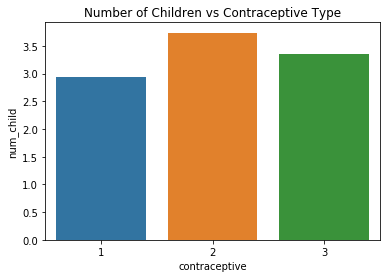

In [140]:
sns.barplot(data = data, x = "contraceptive", y = "num_child", ci = False)
plt.title("Number of Children vs Contraceptive Type")
plt.show();

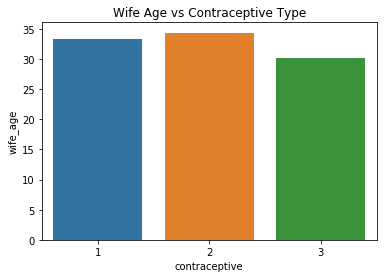

In [112]:
sns.barplot(data = data, x = "contraceptive", y = "wife_age", ci = False)
plt.title("Wife Age vs Contraceptive Type")
plt.show();

## Modeling

In [291]:
def accuracy(given, predicted):
    correct = 0

    for i in range(0, len(given)):
        if given["contraceptive"].iloc[i] == predicted[i]:
            correct += 1
            
    return correct / len(given)

### Logistic Regression Model

#### Creating and Fitting

In [297]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [298]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'saga')
#model = LinearRegression()

In [299]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

#### Model Validation

In [300]:
y_fitted = model.predict(X_train)

print("Training data prediction accuracy: %f" % accuracy(y_train, y_fitted))

Training data prediction accuracy: 0.530560


In [301]:
from sklearn.model_selection import cross_val_score

In [302]:
scores = cross_val_score(model, X_train, y_train, cv = 5)

print("Train data 5 Fold Cross Validation Score for Logistic Regression Model: %f" % np.mean(scores));

Train data 5 Fold Cross Validation Score: 0.527195


In [303]:
y_pred = model.predict(X_test)

print("Test data prediction accuracy: %f" % accuracy(y_test, y_pred))

Test data prediction accuracy: 0.467797


### Random Forest Model

#### Creating and Fitting

In [311]:
#Recreate date without OHE

X_train, X_test, y_train, y_test = train_test_split(data[features], data[response], test_size = 0.20)

In [312]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [313]:
forest = RandomForestClassifier()

In [314]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Model Validation

In [315]:
y_fitted = forest.predict(X_train)

print("Training data prediction accuracy: %f" % accuracy(y_train, y_fitted))

Training data prediction accuracy: 0.945671


In [316]:
scores = cross_val_score(forest, X_train, y_train, cv = 5)

print("Train data 5 Fold Cross Validation Score for Random Forest Classifier: %f" % np.mean(scores))

Train data 5 Fold Cross Validation Score for Random Forest Classifier: 0.528111


In [317]:
y_pred = forest.predict(X_test)

print("Test data prediction accuracy: %f" % accuracy(y_test, y_pred))

Test data prediction accuracy: 0.471186


## Results